In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import imblearn.over_sampling as RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, cohen_kappa_score





In [7]:
df = pd.read_csv('brain_stroke.csv')
df.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [10]:
print ('jumlah baris dan kolom : ', df.shape)
print ('jumlah nilai duplikasi : ', df.duplicated() .sum())
print ('jumlah nilai kosong : ', df.isna() .sum())

jumlah baris dan kolom :  (4981, 11)
jumlah nilai duplikasi :  0
jumlah nilai kosong :  gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [12]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [14]:
categorical = df.select_dtypes(include='object')

for i in categorical.columns:
    if categorical[i].nunique() < 3:
        print (categorical[i].value_counts())
        print()



Female    2907
Male      2074
Name: gender, dtype: int64

Yes    3280
No     1701
Name: ever_married, dtype: int64

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64



In [15]:
numeric = df.select_dtypes(exclude='object')
numeric.head(6)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1
5,74.0,1,1,70.09,27.4,1


In [16]:
df = pd.get_dummies(df, columns=[col for col in df.columns if col in categorical])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [17]:
y = df.stroke 
x = df.drop('stroke', axis=1)

In [18]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler (sampling_strategy='minority')
x, y = oversample.fit_resample(x, y)

<AxesSubplot: ylabel='stroke'>

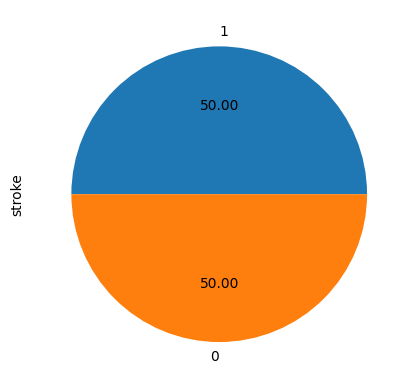

In [21]:
y.value_counts().plot.pie(autopct='%.2f')

In [24]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=1)

In [25]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(7572, 19)
(7572,)
(1894, 19)
(1894,)


In [26]:
def classification(x_train,x_test,y_train, y_test, n): 
    classifiers = {
        'DECISION': DecisionTreeClassifier(),
        'FOREST':RandomForestClassifier(n_estimators=n),
        'EXTRA':ExtraTreesClassifier(n_estimators=n),
        'KNN':KNeighborsClassifier(),
    }
    modelling = []
    for n, m in classifiers.items():
        print(n)

        m.fit(x_train, y_train)
        y_pred = m.predict(x_test)

        print('Train Score:', m.score(x_train, y_train))
        print('Test Score:', m.score(x_test, y_test))
        print('-'*5)
        print('Accuracy:', accuracy_score(y_test, y_pred))
        print('Precision', precision_score(y_test, y_pred))
        print('Recall:', recall_score(y_test, y_pred))
        print('F1 Score:', f1_score(y_test, y_pred))
        print('KAPPA:', cohen_kappa_score(y_test, y_pred))
        print('-'*5)
        print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
        print()
        print(classification_report(y_test, y_pred))
        acc = n,m.score(x_test, y_test),precision_score(y_test, y_pred),f1_score(y_test, y_pred),recall_score(y_test, y_pred),cohen_kappa_score(y_test, y_pred)
        modelling.append(acc)
        tabel = pd.DataFrame(modelling, columns=['Model','Score','Precision','F1_Score','Recall','Kappa'])
        

        print()
        
    display(tabel.sort_values('Score', ascending=False))

tabel = classification(x_train,x_test,y_train, y_test, 100)
display(tabel)

DECISION
Train Score: 1.0
Test Score: 0.9693769799366421
-----
Accuracy: 0.9693769799366421
Precision 0.9416498993963782
Recall: 1.0
F1 Score: 0.9699481865284973
KAPPA: 0.9387892471632383
-----
Confusion Matrix
 [[900  58]
 [  0 936]]

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894


FOREST
Train Score: 1.0
Test Score: 0.989440337909187
-----
Accuracy: 0.989440337909187
Precision 0.9790794979079498
Recall: 1.0
F1 Score: 0.9894291754756871
KAPPA: 0.9788830069527755
-----
Confusion Matrix
 [[938  20]
 [  0 936]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       958
           1       0.98      1.00      0.99       936

    accuracy                           0

,Model,Score,Precision,F1_Score,Recall,Kappa
2,EXTRA,0.992080,0.984227,0.992051,1.0,0.984161
1,FOREST,0.989440,0.979079,0.989429,1.0,0.978883
0,DECISION,0.969377,0.941650,0.969948,1.0,0.938789
3,KNN,0.924498,0.867470,0.929032,1.0,0.849241


None